Example of an unsupervised learning coz its a anamoly detection problem.

# Credit Card Fraud Detection

#### Import necessary packages and check their version

In [25]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook
print("Python: {}".format(sys.version))
print("Pandas: {}".format(pd.__version__))
print("Numpy: {}".format(np.__version__))

Python: 3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
Pandas: 0.23.4
Numpy: 1.15.4


#### Load the dataset from the csv file using pandas

In [15]:
data = pd.read_csv('creditcard.csv')

#### Explore the dataset

In [16]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

###### Columns Description:
TimeNumber of seconds elapsed between this transaction and the first transaction in the dataset
V1may be result of a PCA Dimensionality reduction to protect user identities and sensitive features(v1-v28)
V2
V3
.....
AmountTransaction amount
Class1 for fraudulent transactions, 0 otherwise

In [17]:
print(data.shape)

(284807, 31)


In [20]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

The class column mean shows it nears zero so there are more valid transactions than fraud transactions.

In [21]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

No missing values

Since its huge we can sample this dataset.

In [22]:
#Take only 10 percent of the data to work with
data = data.sample(frac=0.1, random_state=123) 

In [24]:
data.shape

(28481, 31)

### Exploration of the Data

#### Plot histogram of each parameter

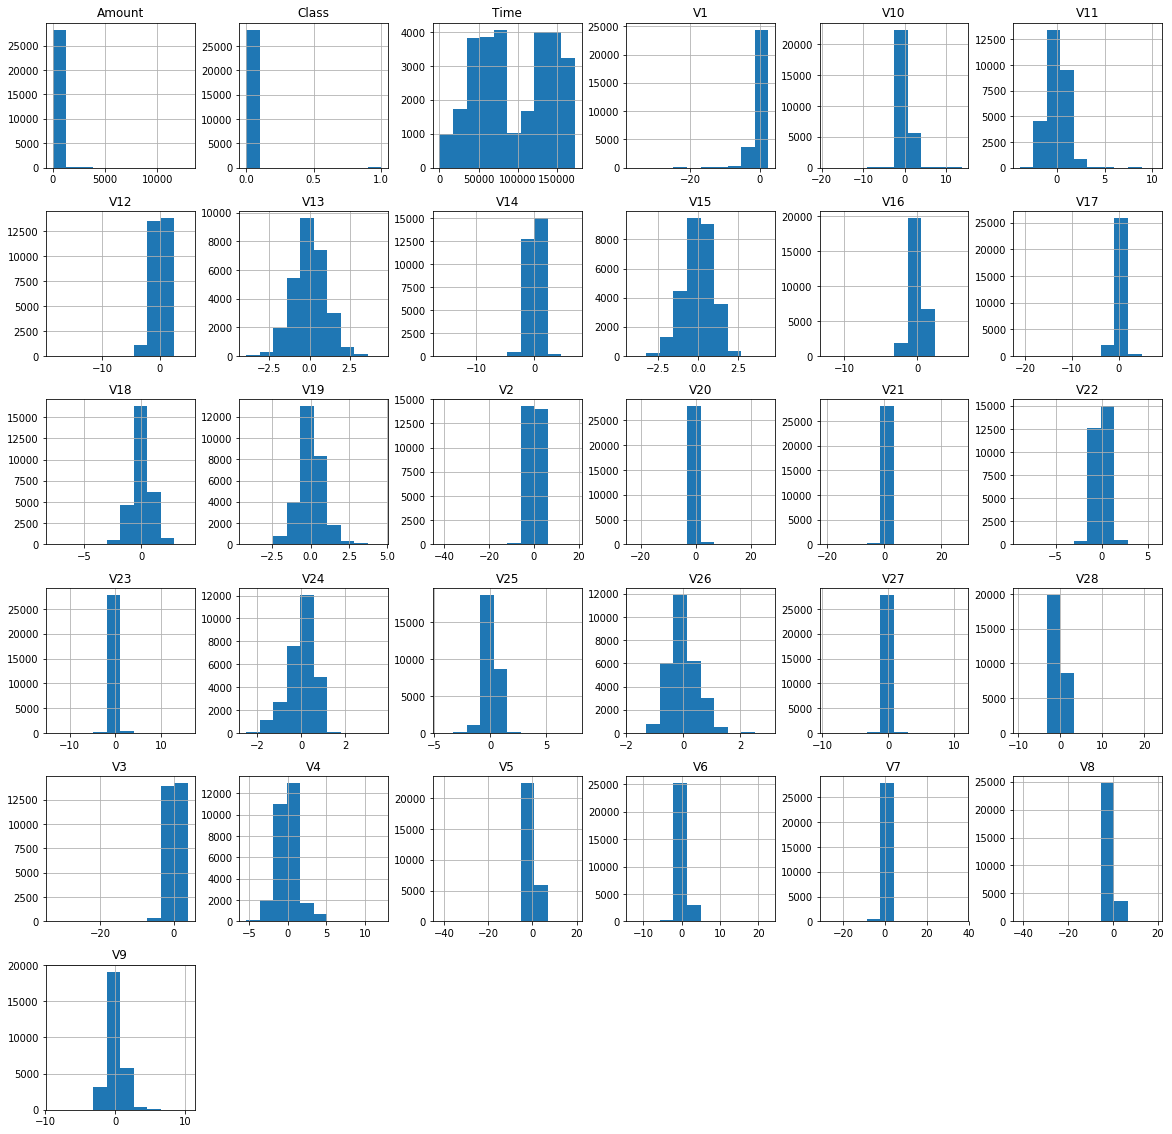

In [27]:
%matplotlib inline
data.hist(figsize = (20,20))
plt.show()

Inference

Very few fraud transaction when viewing class histogram
All transactions are around zero and very few large outliers or no outliers

In [35]:
#Calculate percentage of valid and fraud transactions.
Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0] 

outlier_fraction  = len(Fraud) / float(len(Valid))
print(outlier_fraction)

0.0017938797045374604


In [34]:
print("Fraud Transactions: {}". format(len(Fraud)))
print("Valid Transaction: {}". format(len(Valid)))

Fraud Transactions: 51
Valid Transaction: 28430


Its a quite good example of class imbalance.

In [ ]:
#### Correlation Matrix 

In [36]:
# Find any strong correlation between features so that we can remove those correlated features, linear relationship between features
# Also shows us which features are important

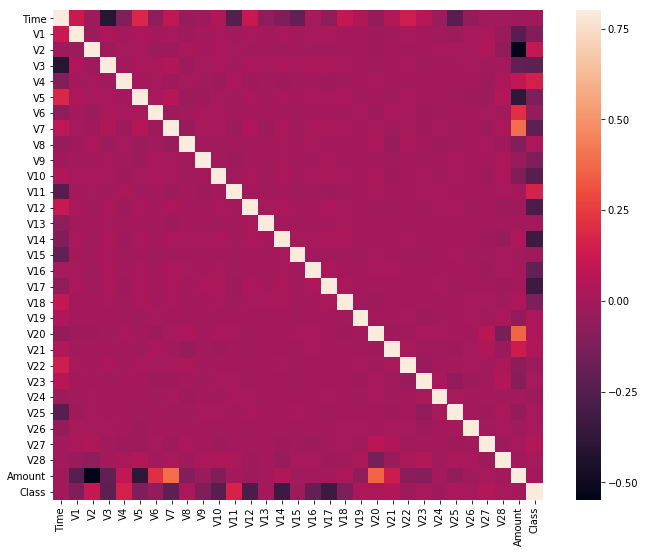

In [38]:
corrmat = data.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat, vmax=.8, square = True)
plt.show()

Most of them are fairly unrelated as they are close to zero. But class and different features are related in different ways. Both
positively and negatively correlated.

v11 stronger positive corr and v17 stronger negative corr with class. No 1:1 corr so no need to pull out any columns.

In [41]:
#separate labels and columns
columns = data.columns.tolist()

#Filter columns and remove labels
columns = [ c for c in columns if c not in ['Class']]

In [42]:
# variable we will be predicting
target = 'Class'

X = data[columns]
y = data[target]

print(X.shape)
print(y.shape)

(28481, 30)
(28481,)


### Build the models

We will use isolation forest algorithm and local outlier factor algorithm.

In [44]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
#above are the two anamoly detection algorithms. Also SVC used for outlier detection but takes long time for such a big dataset

Local Outlier Factor (LOF) is a score that tells how likely a certain data point is an outlier/anomaly.

LOF ≈1 ⇒ no outlier
LOF ≫1 ⇒ outlier
First, I introduce a parameter k which is the number of neighbors the LOF calculation is considering. 
The LOF is a calculation that looks at the neighbors of a certain point to find out its density and compare 
this to the density of other points later on. Using a right number k isn’t straight forward. While a small k has 
a more local focus, i.e. looks only at nearby points, it is more erroneous when having much noise in the data.
A large k, however, can miss local outliers. the LOF of a point tells the density of this point compared to the density 
of its neighbors. If the density of a point is much smaller than the densities of its neighbors (LOF ≫1), the point is 
far from dense areas and, hence, an outlier.

LOF is an unsupervised oulier detection algorithm. It calculates the score for each sample and its the LOF. It calculates the deviation
of density wrt its neighbours. Similar to knn. 

Isolation Forest returns anamoly score based by randomly selecting a feature and randomly selecting a split value and isolates a 
sample wrt to path from root node to leaf node. 
Isolation Forest, like any tree ensemble method, is built on the basis of decision trees. In these trees, partitions are created by first randomly selecting a feature and then selecting a random split value between the minimum and maximum value of the selected feature.

In principle, outliers are less frequent than regular observations and are different from them in terms of values 
(they lie further away from the regular observations in the feature space). That is why by using such random partitioning
they should be identified closer to the root of the tree (shorter average path length, i.e., the number of edges an observation
                                                          must pass in the tree going from the root to the terminal node), 
with fewer splits necessary.

In [47]:
#define random state
random_state = 1

#define dictionary of outlier detection methods
classifiers = {
        "Isolation Forest" : IsolationForest(max_samples = len(X), contamination = outlier_fraction, random_state = random_state),
        "Local Outlier Factor" : LocalOutlierFactor(n_neighbors = 20, contamination = outlier_fraction)
}


In [48]:
n_outliers = len(Fraud)

#Fit the model
for i, (clf_name, clf) in enumerate(classifiers.items()):
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_predict = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_predict = clf.decision_function(X)
        y_pred = clf.predict(X)
        
    #note : y_pred gives -1 for outlier and 1 for inlier, reshape it as we have class values 0 for inliers and 1 for outliers here

    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    n_errors = (y_pred != y).sum()
    
    #Print Classification metrics
    print('{} : {}'.format(clf_name,n_errors))
    print(accuracy_score(y,y_pred))
    print(classification_report(y,y_pred))

C:\Users\Gracy\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\Gracy\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation Forest : 61
0.9978582212703205
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28430
           1       0.40      0.41      0.41        51

   micro avg       1.00      1.00      1.00     28481
   macro avg       0.70      0.71      0.70     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor : 103
0.9963835539482462
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28430
           1       0.00      0.00      0.00        51

   micro avg       1.00      1.00      1.00     28481
   macro avg       0.50      0.50      0.50     28481
weighted avg       1.00      1.00      1.00     28481



Looking at the score LOF didn't predict any fraud cases as you see precision, recall n f1-socre for LOF is 0. But accuracy is 99.6
But looking at IF precision, recall andf1-socre is much better...it has detect 40 % of fraud cases and accuracy is 99.78 percent.
So lot of false negatives. 
So in IF 40% of the time the Fraud txn is detected.

We can also increase the samples but it takes quite a long computational time.